In [44]:
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


In [126]:
# Fetching the data

faces = fetch_olivetti_faces()

X = faces.data
y = faces.target

# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42, stratify=y)

In [124]:
# Setting the number of categories
categories = 40

kmeans = KMeans(n_clusters=categories, n_init=5, max_iter=10000, tol=1e-5)

categorized = kmeans.fit_predict(X_train)

In [129]:
predictions = kmeans.predict(X_test)

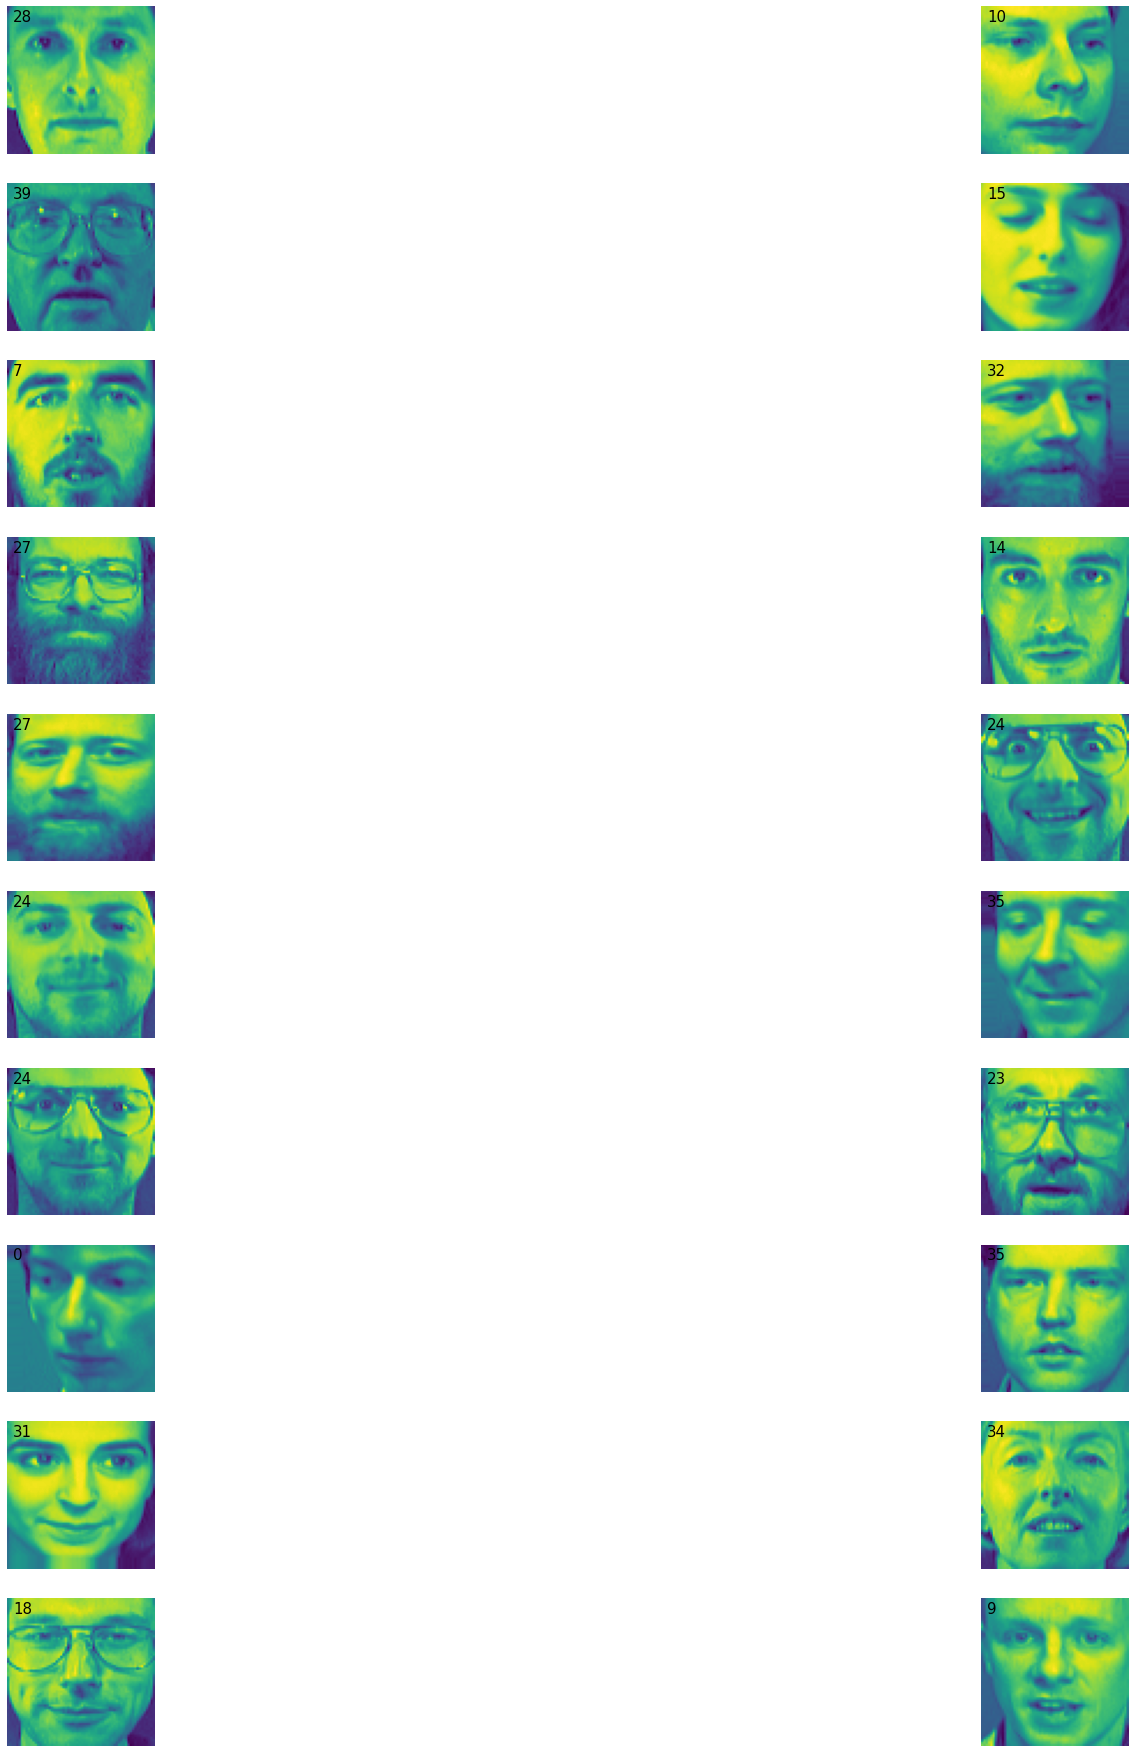

In [74]:
# Plotting examples from each category based on training and predictions
plt.figure(figsize=(32,32))
for i in range(10):
    ax = plt.subplot(10,2,i*2+1)
    img = X_train[i].img(64,64)
    ax.imshow(img)
    label = categorized[i]
    string = r'{}'.format(label)
    ax.text(2, 6, string , fontsize=15)
    ax.axis('off')

    ax1 = plt.subplot(10,2,i*2+2)
    img1 = X_test[i].img(64,64)
    ax1.imshow(img1)
    label1 = predictions[i]
    string1 = r'{}'.format(label1)
    ax1.text(2,6, string1, fontsize=15)
    ax1.axis('off')

plt.show()

In [133]:
def plot_categories_matrix(number_of_categories, max_number_of_examples_to_show, picture_array, trained_model):
    f, axarr = plt.subplots(max_examples, categories)
    f.set_size_inches(categories, max_examples)
    for cat in range(number_of_categories):
        indexes_of_label = np.where(trained_model == cat)

        for i in range(min(max_number_of_examples_to_show, indexes_of_label[0].size)):
            index_of_picture_with_label = indexes_of_label[0][i]
            img = picture_array[index_of_picture_with_label].reshape(64,64)
            axarr[i, cat].imshow(X=img)
            axarr[i, cat].axis('off')
    f.show()

<ipython-input-127-cf05b6f1e338>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


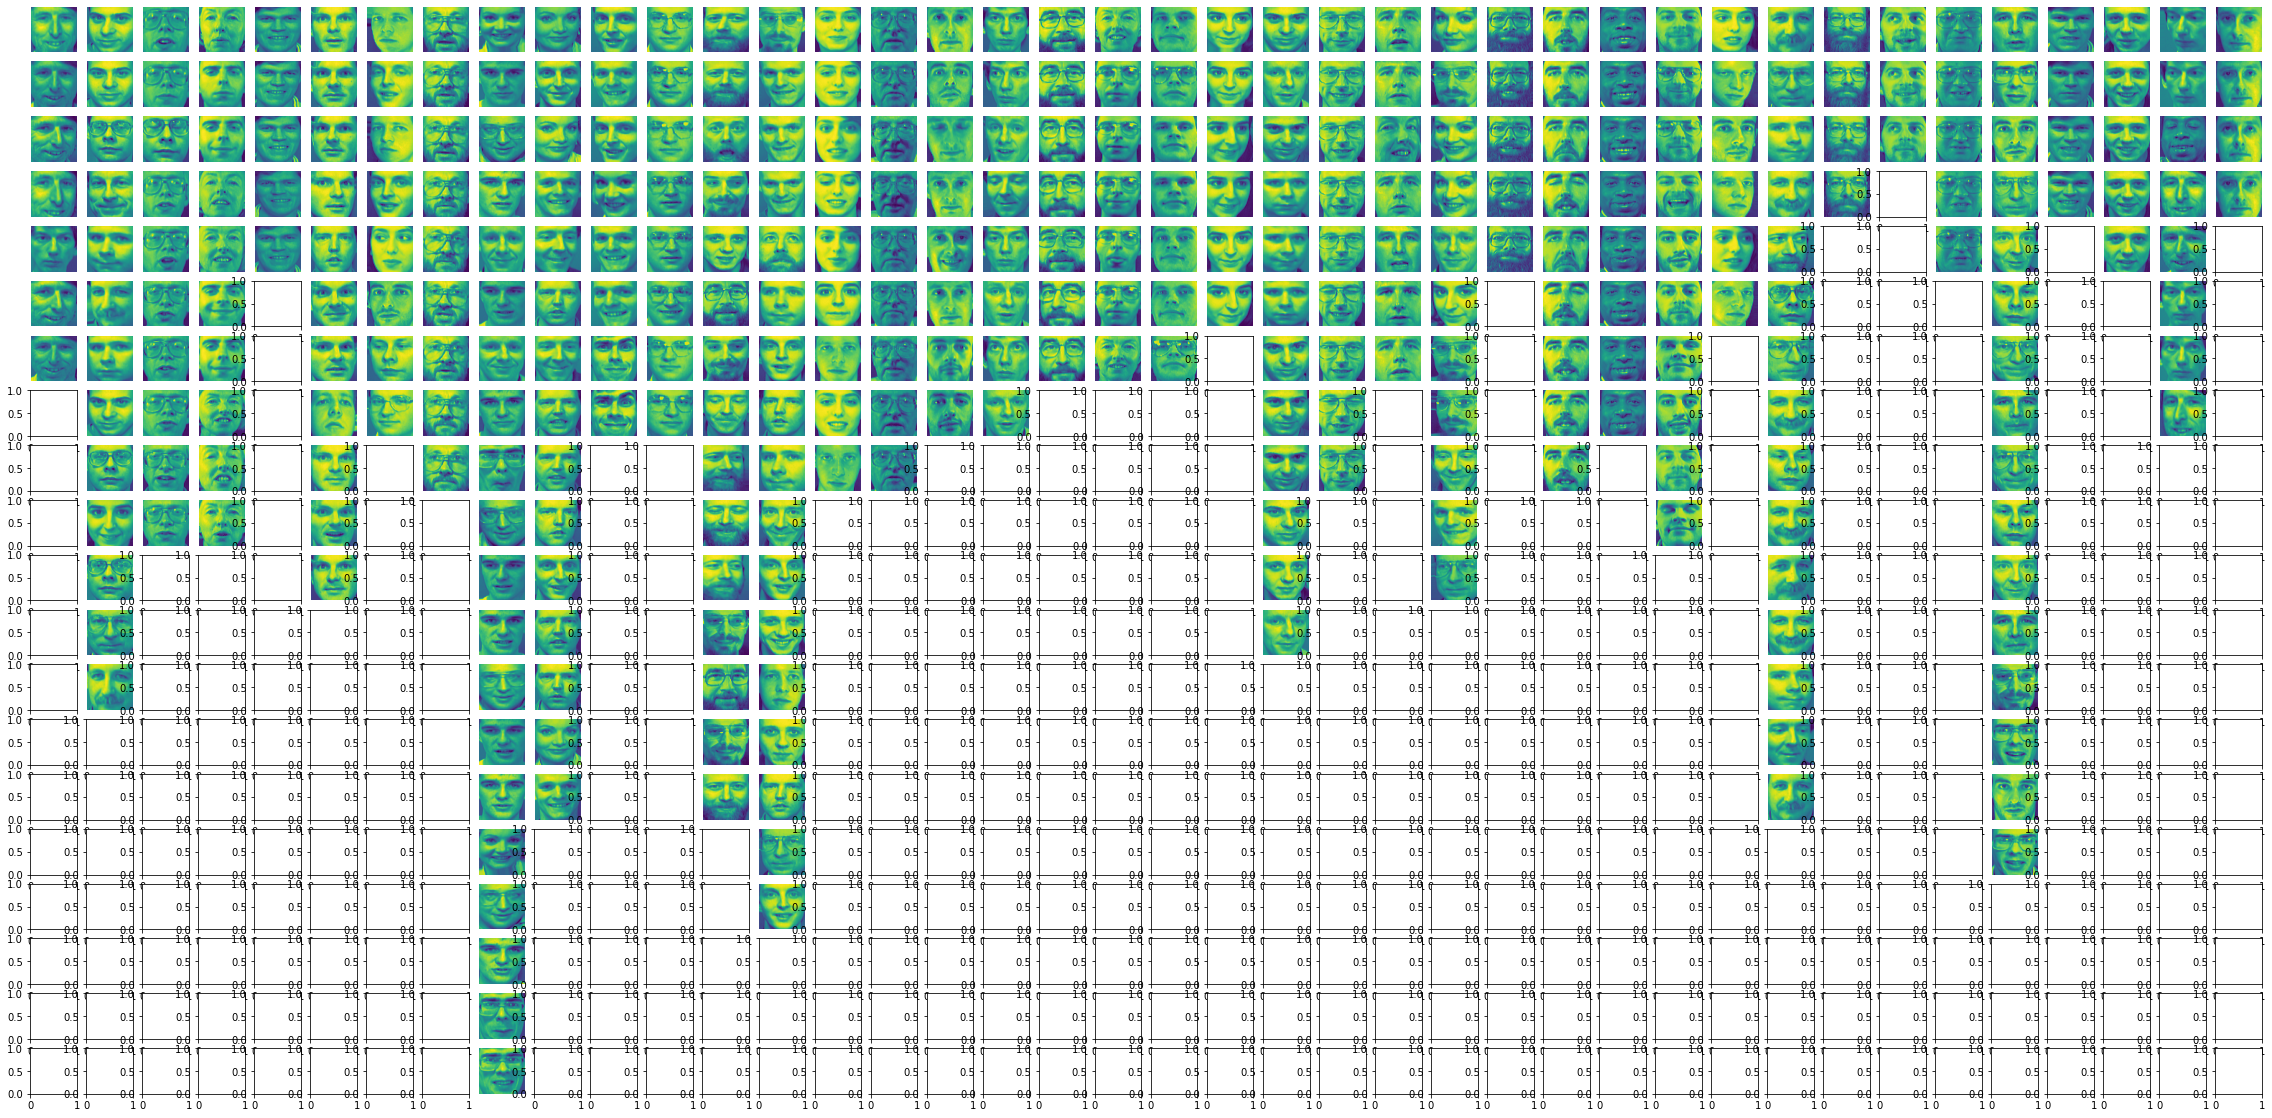

In [128]:
#plotting the groups
max_examples = 9

plot_categories_matrix(categories, max_examples, X_train, categorized)

<ipython-input-133-fbf7bdc48dfb>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


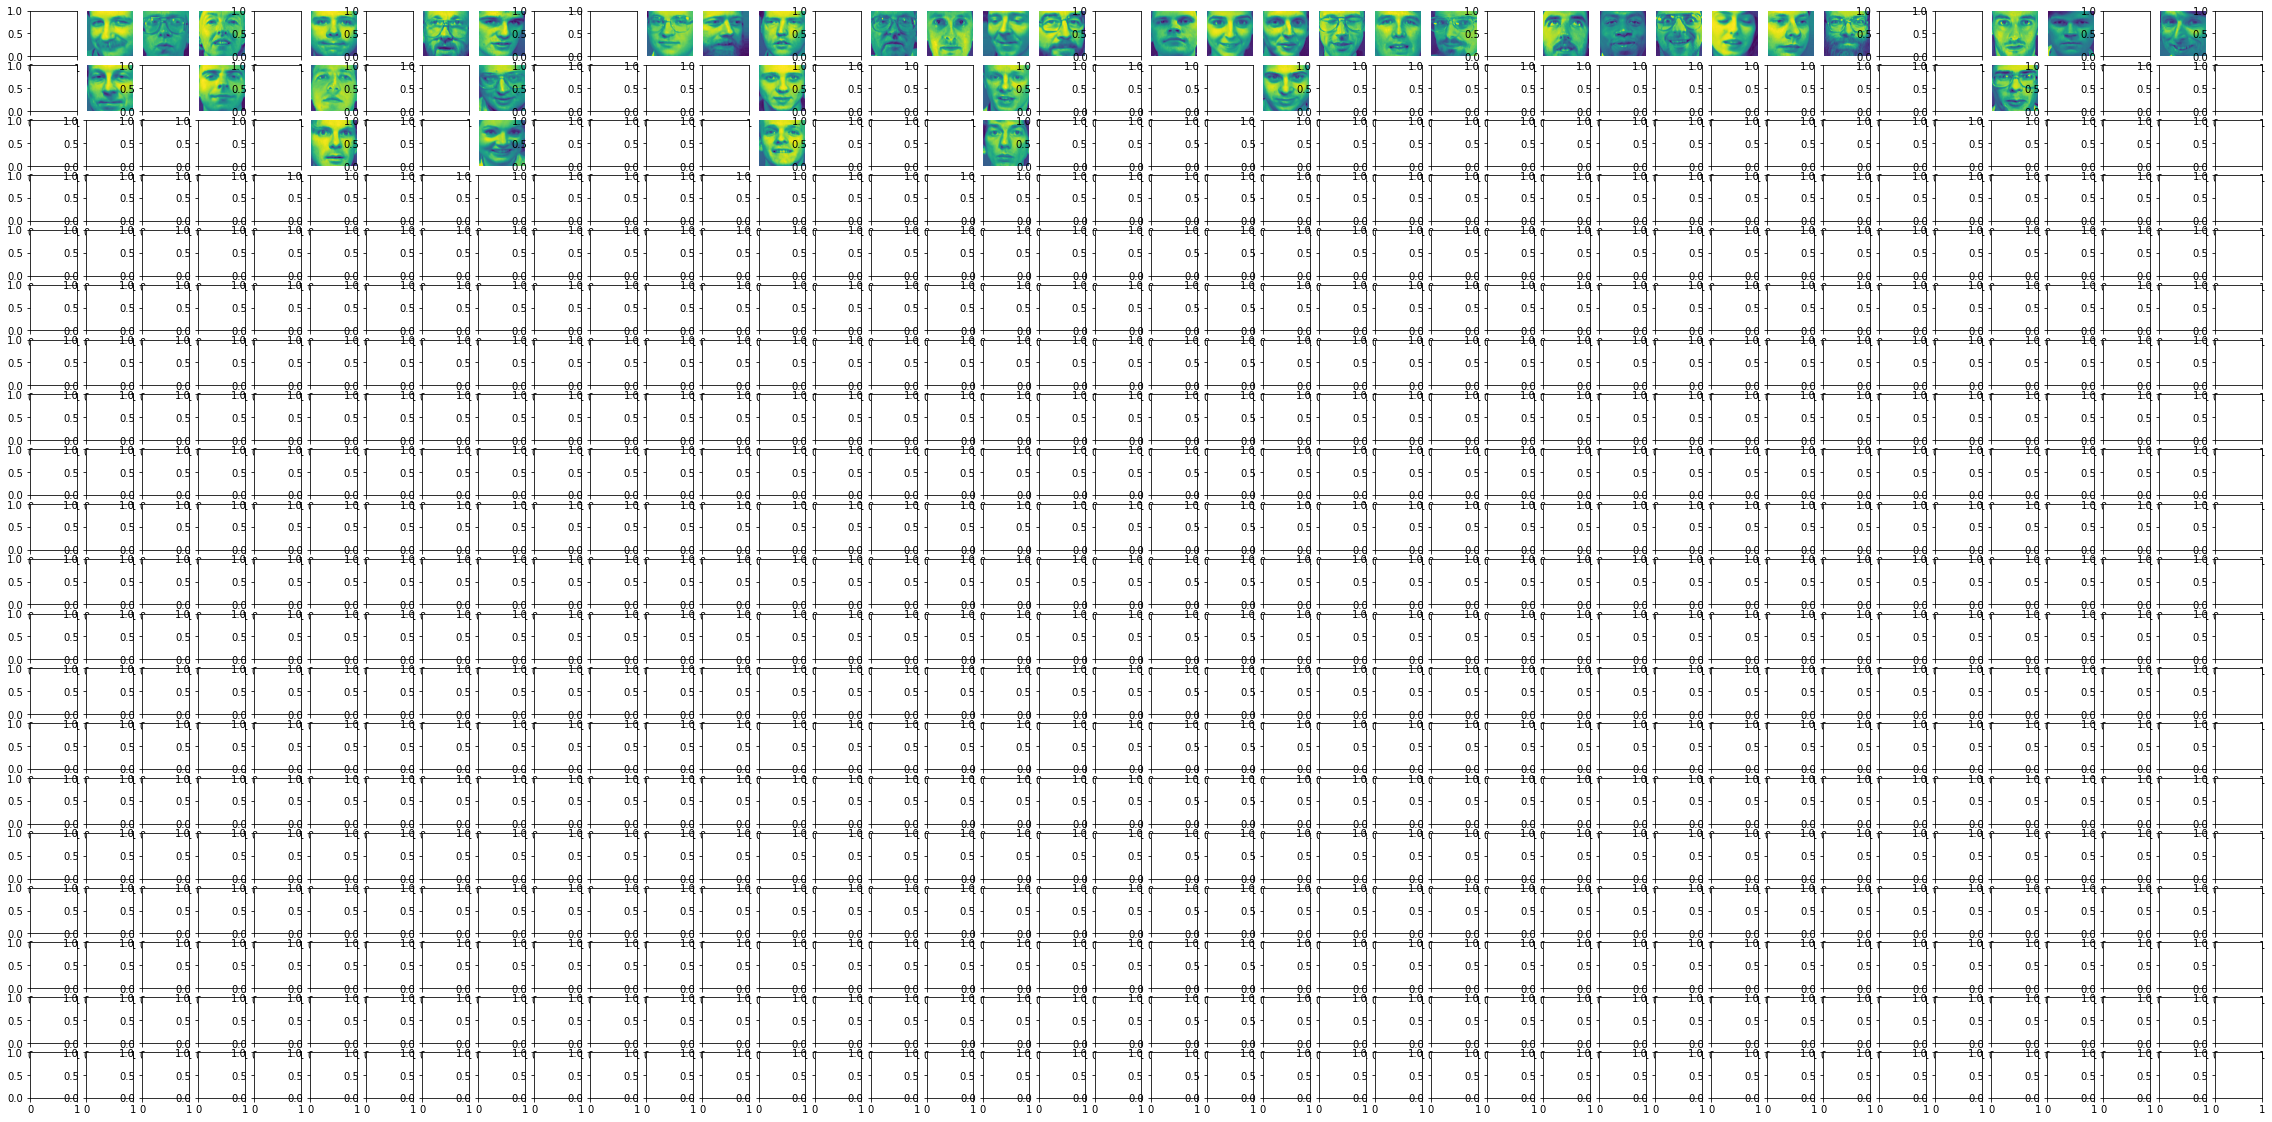

In [134]:
plot_categories_matrix(categories, max_examples, X_test, predictions)

